In [2]:
%load_ext rpy2.ipython

#Test gamma.mean, beta.mean for *de novo* data


#LoF

In [43]:
%%R -w 28 -h 28 -u cm

library("data.table")
d.dn.lof.grid <- fread("/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/results.combined3Diseases.dn.lof.txt")

print(head(d.dn.lof.grid))
dim(d.dn.lof.grid)


      V1 V2  V3        V4
1: 0.001  2 0.2 -2963.227
2: 0.001  2 0.4 -2981.219
3: 0.001  2 0.6 -2990.484
4: 0.001  2 0.8 -2996.274
5: 0.001  2 1.0 -3000.260
6: 0.001  2 1.2 -3003.171
[1] 18200     4


In [44]:
%%R
#.Machine$double.eps
d.dn.lof.grid <- d.dn.lof.grid[pgamma(1, V2*V3, rate = V3) < 0.001]
dim(d.dn.lof.grid)


[1] 16692     4


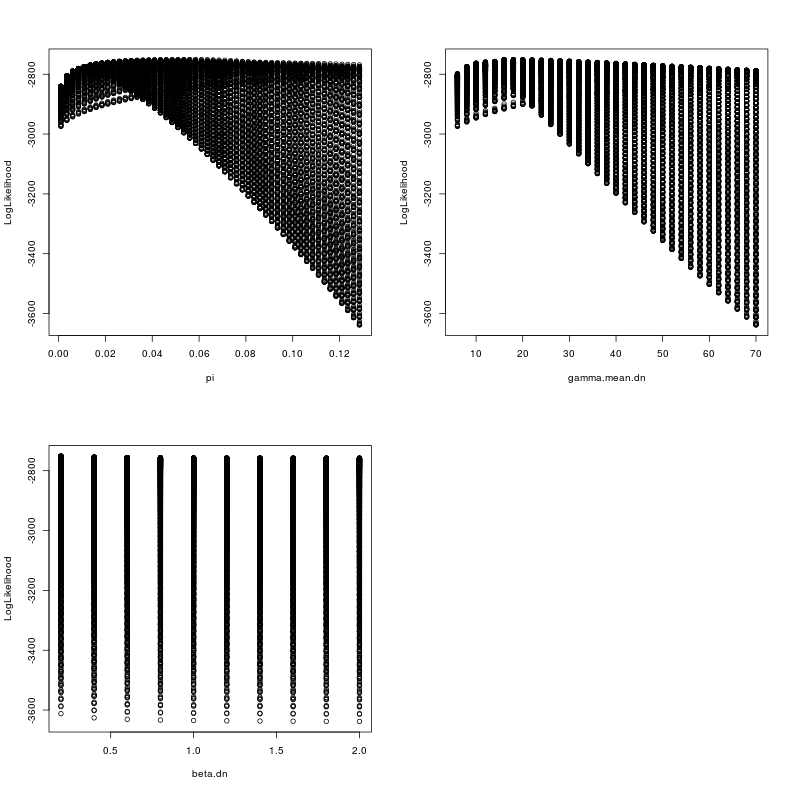

In [45]:
%%R -w 28 -h 28 -u cm

colNames <- c("pi", "gamma.mean.dn", "beta.dn" )
par(mfrow = c(2, 2))
for (ii in 1:3)
    plot(d.dn.lof.grid[[ii]], d.dn.lof.grid[[4]], xlab = colNames[ii], ylab = 'LogLikelihood')


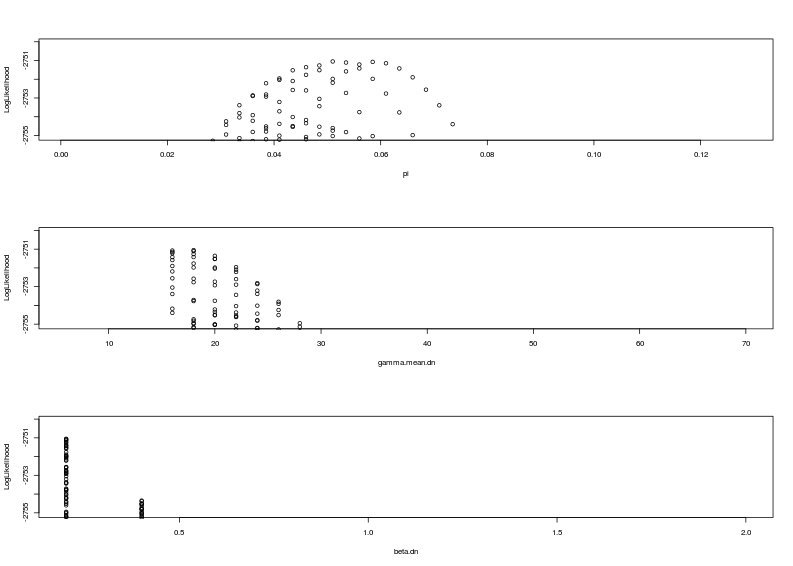

In [46]:
%%R -w 28 -h 20 -u cm
uLimit <- max(d.dn.lof.grid[[4]]) + 1
lLimit <- uLimit - 5

par(mfrow = c(3, 1))
for (ii in 1:3)
    plot(d.dn.lof.grid[[ii]], d.dn.lof.grid[[4]], xlab = colNames[ii], ylab = 'LogLikelihood',
        ylim = c(lLimit, uLimit))


In [47]:
%%R
d.dn.lof.grid.highLLK <- d.dn.lof.grid[V4 >= lLimit]
d.dn.lof.grid.highLLK <- d.dn.lof.grid.highLLK[order(V4)]

print(head(d.dn.lof.grid.highLLK , 20))
print(tail(d.dn.lof.grid.highLLK ))


        V1 V2  V3        V4
 1: 0.0585 20 0.2 -2755.033
 2: 0.0510 20 0.4 -2755.028
 3: 0.0410 20 0.4 -2755.006
 4: 0.0660 18 0.2 -2754.981
 5: 0.0310 28 0.2 -2754.947
 6: 0.0485 18 0.4 -2754.941
 7: 0.0535 18 0.4 -2754.816
 8: 0.0360 24 0.4 -2754.809
 9: 0.0385 24 0.4 -2754.788
10: 0.0510 18 0.4 -2754.739
11: 0.0385 22 0.4 -2754.618
12: 0.0510 22 0.2 -2754.601
13: 0.0435 22 0.4 -2754.539
14: 0.0485 20 0.4 -2754.530
15: 0.0385 26 0.2 -2754.516
16: 0.0435 20 0.4 -2754.497
17: 0.0310 24 0.2 -2754.437
18: 0.0735 16 0.2 -2754.397
19: 0.0410 22 0.4 -2754.377
20: 0.0460 20 0.4 -2754.345
       V1 V2  V3        V4
1: 0.0485 18 0.2 -2751.263
2: 0.0560 16 0.2 -2751.213
3: 0.0610 16 0.2 -2751.146
4: 0.0535 18 0.2 -2751.107
5: 0.0585 16 0.2 -2751.072
6: 0.0510 18 0.2 -2751.050


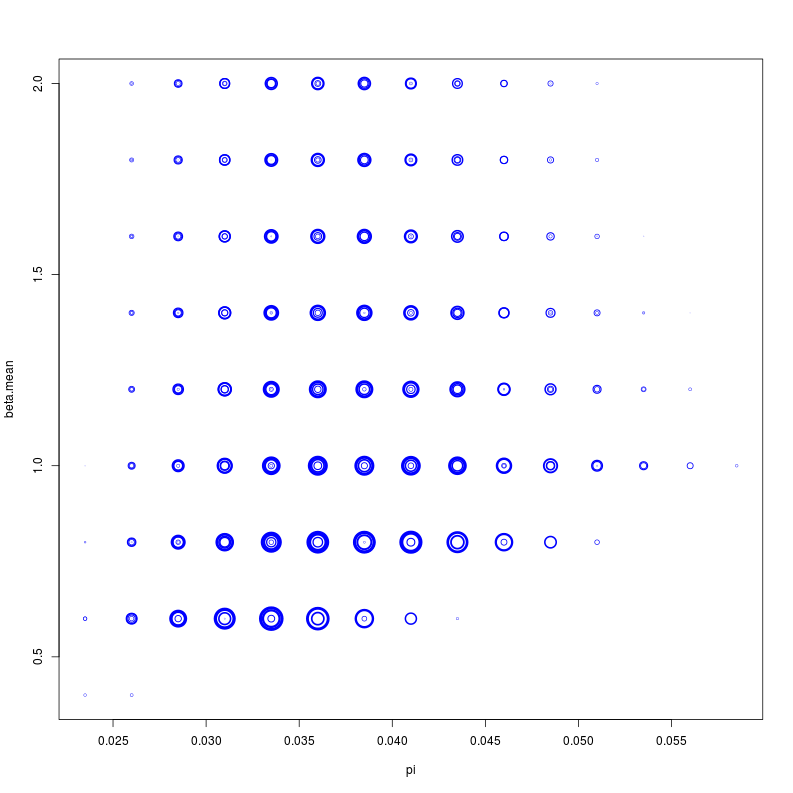

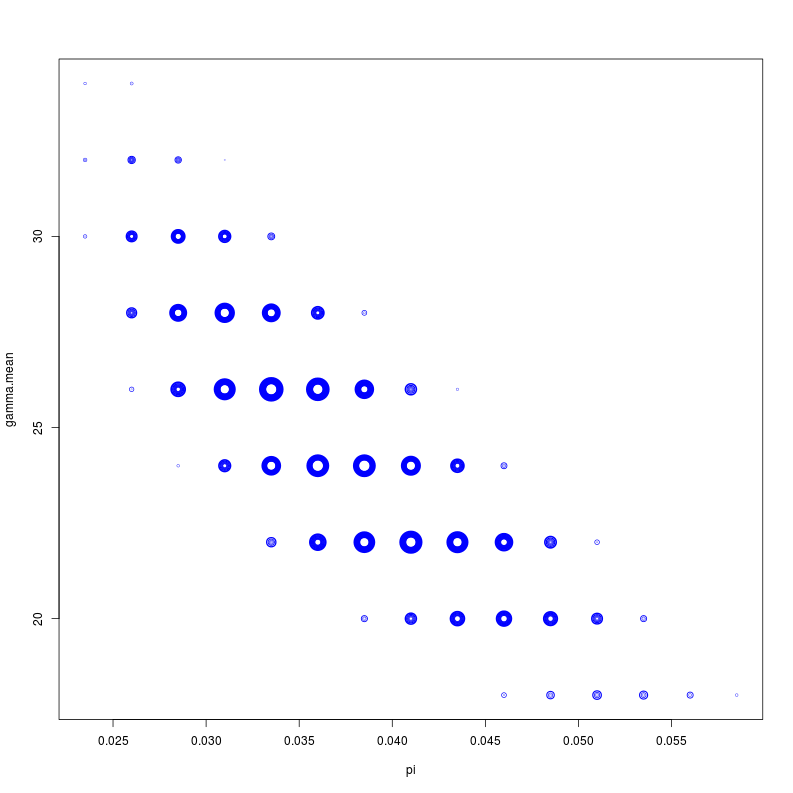

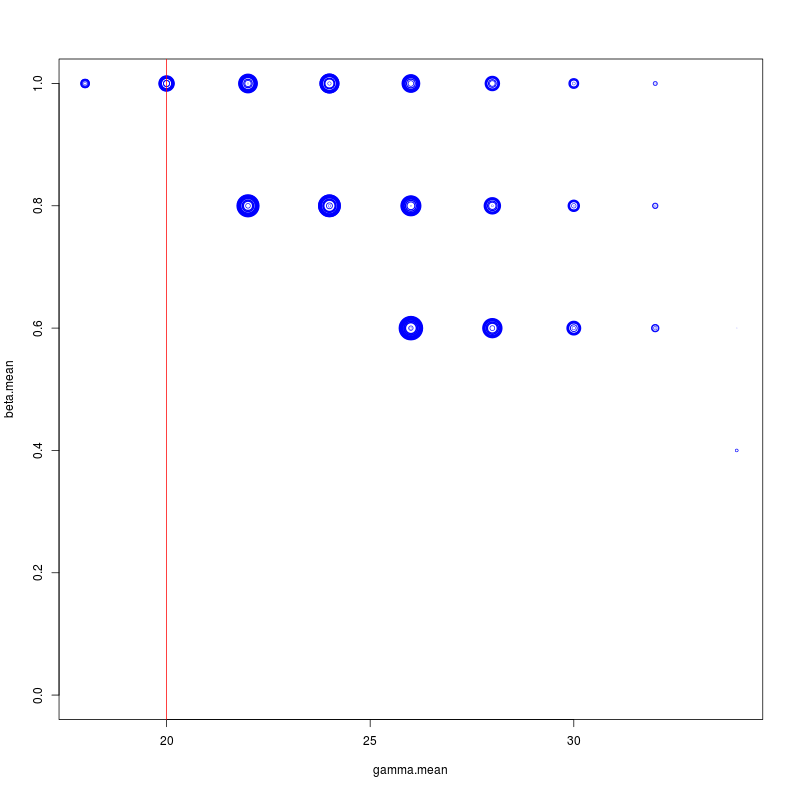

In [37]:
%%R -w 28 -h 28 -u cm

d.dn.grid.highLLK <- as.data.frame(d.dn.lof.grid.highLLK)
plot(d.dn.grid.highLLK[, 1], d.dn.grid.highLLK[, 2], lwd = d.dn.grid.highLLK[, 4] - lLimit, col = 'blue',
    xlab = 'pi', ylab = 'gamma.mean', cex = d.dn.grid.highLLK[, 4] - lLimit)

plot(d.dn.grid.highLLK[, 1], d.dn.grid.highLLK[, 3], lwd = d.dn.grid.highLLK[, 4] - lLimit, col = 'blue',
    xlab = 'pi', ylab = 'beta.mean', cex = d.dn.grid.highLLK[, 4] - lLimit)

plot(d.dn.grid.highLLK[, 2], d.dn.grid.highLLK[, 3], lwd = d.dn.grid.highLLK[, 4] - lLimit, col = 'blue',
    xlab = 'gamma.mean', ylab = 'beta.mean', cex = d.dn.grid.highLLK[, 4] - lLimit, ylim = c(0, 1))

abline(v = 20, col= 'red')

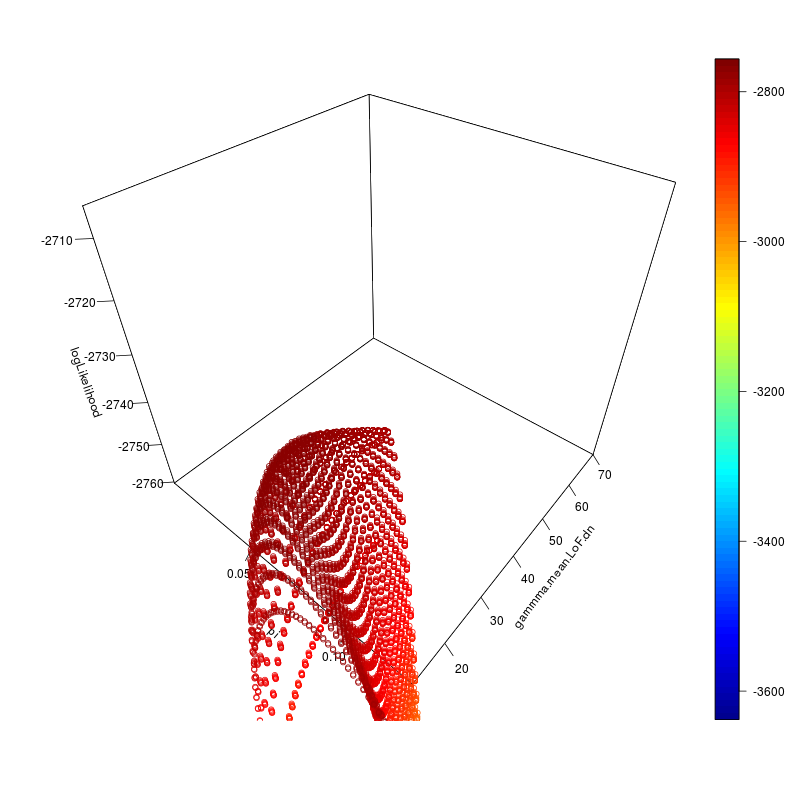

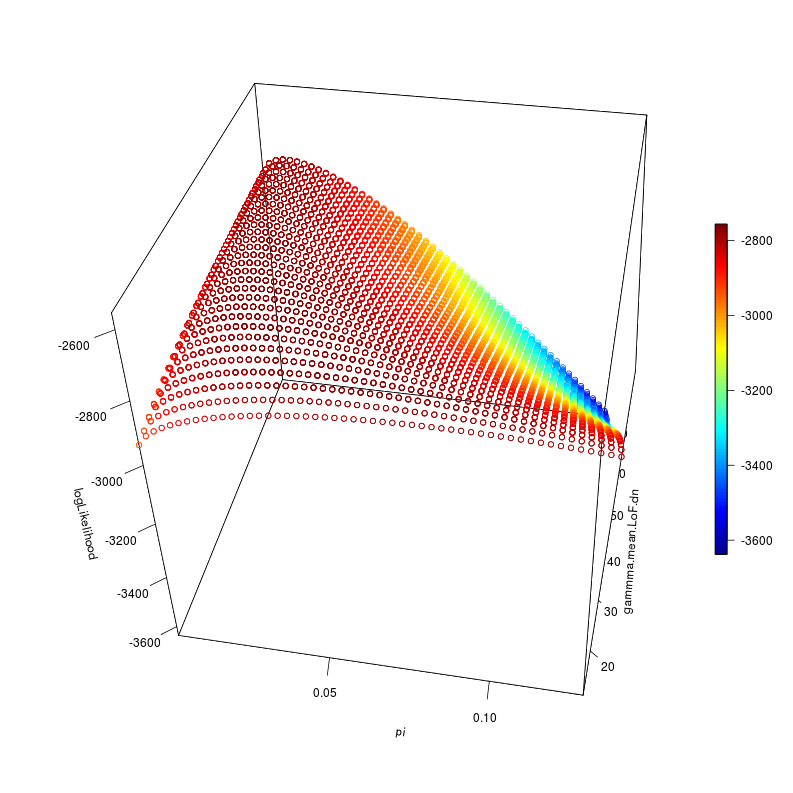

In [38]:
%%R -w 28 -h 28 -u cm
library("plot3D")
d.dn.grid <- as.data.frame(d.dn.lof.grid)
scatter3D(z = d.dn.grid[, 4], x = d.dn.grid[, 1], y = d.dn.grid[, 2], xlab = 'pi', ylab = 'gammma.mean.LoF.dn',
         zlab = 'logLikelihood', theta = 10, d = 2,
         colkey = list(length = 0.5, width = 0.5, cex.clab = 0.75), ticktype = "detailed", 
          zlim = c(min(d.dn.grid[, 4]), uLimit + 200))
scatter3D(z = d.dn.grid[, 4], x = d.dn.grid[, 1], y = d.dn.grid[, 2], xlab = 'pi', ylab = 'gammma.mean.LoF.dn',
         zlab = 'logLikelihood', zlim = c(lLimit, uLimit + 50), ticktype = "detailed")

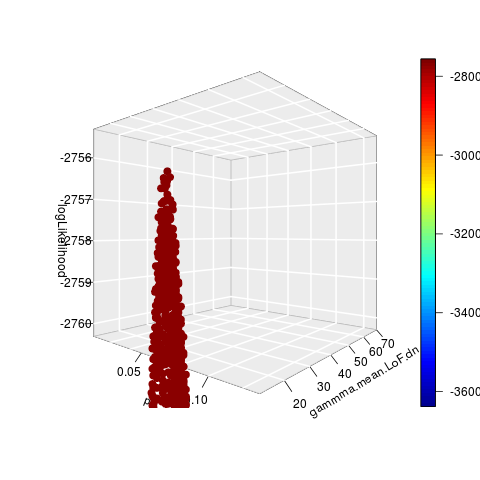

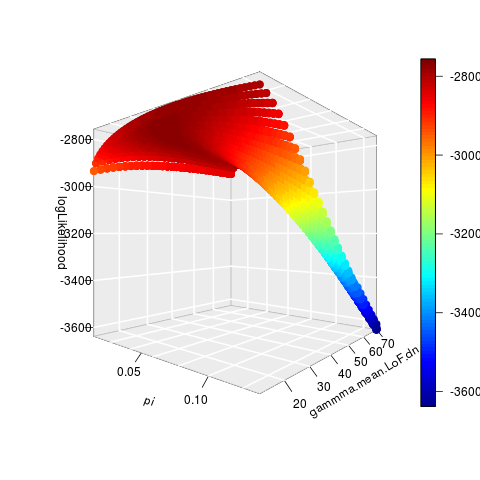

In [39]:
%%R
scatter3D(z = d.dn.grid[, 4], x = d.dn.grid[, 1], y = d.dn.grid[, 2], xlab = 'pi', ylab = 'gammma.mean.LoF.dn',
         zlab = 'logLikelihood', phi = 0, bty = "g",  pch = 20, cex = 2, ticktype = "detailed")

scatter3D(z = d.dn.grid[, 4], x = d.dn.grid[, 1], y = d.dn.grid[, 2], xlab = 'pi', ylab = 'gammma.mean.LoF.dn',
         zlab = 'logLikelihood', phi = 0, bty = "g",  pch = 20, cex = 2, ticktype = "detailed", 
          zlim = c(lLimit, uLimit))

In [40]:
%%R

x1 <- d.dn.grid[, 1]
x2 <- unique(x1)
y1 <- d.dn.grid[, 2]
y2 <- unique(y1)

z2 <- matrix(0, ncol = length(y2), nrow = length(x2))

for (ii in 1:length(x2)){
    for (jj in 1:length(y2)){
        z2[ii, jj] <- d.dn.grid[(d.dn.grid[, 1] == x2[ii]) & (d.dn.grid[, 2] == y2[jj]), 4]
    }}



Error in z2[ii, jj] <- d.dn.grid[(d.dn.grid[, 1] == x2[ii]) & (d.dn.grid[,  : 
  number of items to replace is not a multiple of replacement length


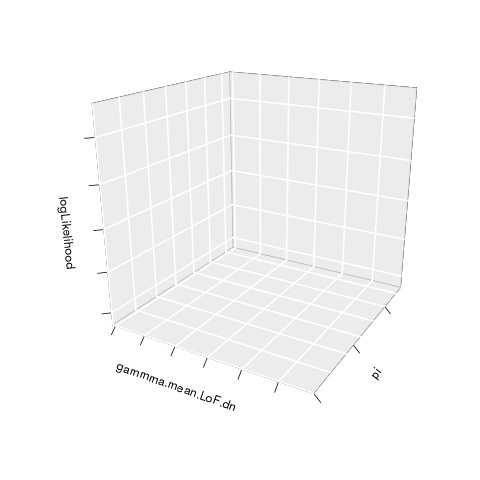

In [41]:
%%R
hist3D (z = z2, x = x2, y = y2,
         bty = "g", phi = 20,  theta = -60,
        xlab = 'pi', ylab = 'gammma.mean.LoF.dn',
         zlab = 'logLikelihood',
         col = "green", border = "black", shade = 0.8,
         ticktype = "detailed", space = 0.15, d = 2, cex.axis = 1e-9,
       
          zlim = c(lLimit, uLimit))

#Mis3

In [48]:
%%R -w 28 -h 28 -u cm

library("data.table")
d.dn.mis3.grid <- fread("/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/results.combined3Diseases.dn.mis3.txt")

print(head(d.dn.mis3.grid))
dim(d.dn.mis3.grid)


      V1 V2  V3        V4
1: 0.001  1 0.1 -5276.021
2: 0.001  1 0.3 -5287.571
3: 0.001  1 0.5 -5293.974
4: 0.001  1 0.7 -5297.899
5: 0.001  1 0.9 -5300.523
6: 0.001  1 1.1 -5302.402
[1] 5850    4


In [50]:
%%R
#.Machine$double.eps
#d.dn.mis3.grid <- d.dn.mis3.grid[pgamma(1, V2*V3, rate = V3) < 0.06]
dim(d.dn.mis3.grid)


[1] 5850    4


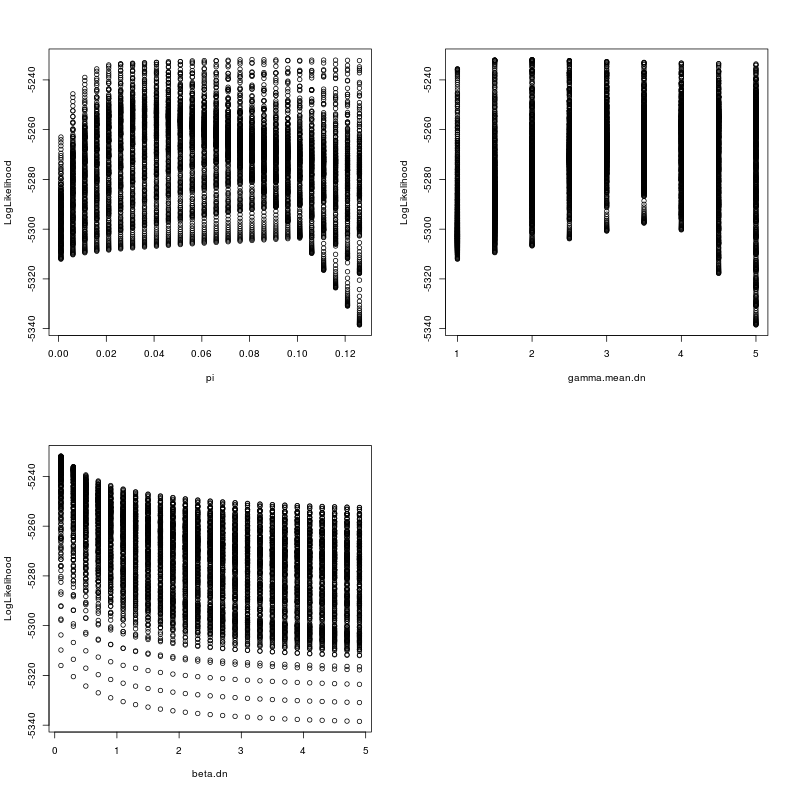

In [51]:
%%R -w 28 -h 28 -u cm
colNames <- c("pi", "gamma.mean.dn", "beta.dn" )
par(mfrow = c(2, 2))
for (ii in 1:3)
    plot(d.dn.mis3.grid[[ii]], d.dn.mis3.grid[[4]], xlab = colNames[ii], ylab = 'LogLikelihood')


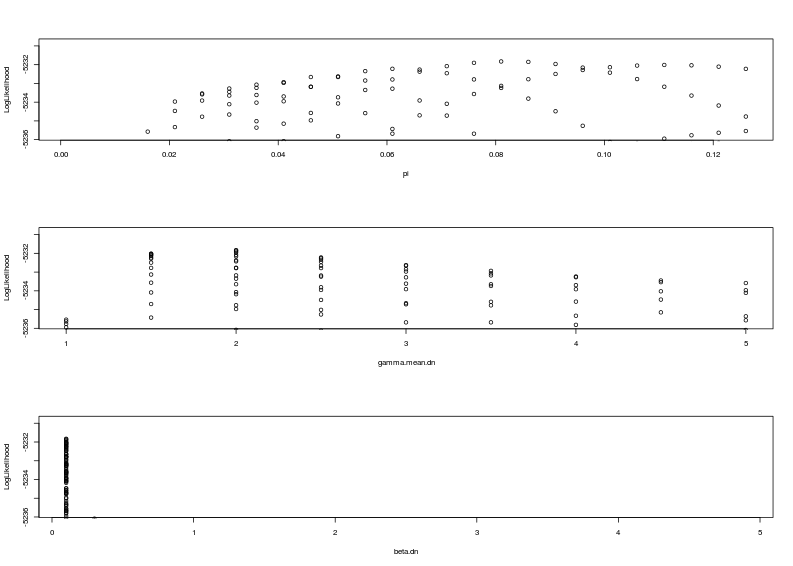

In [52]:
%%R -w 28 -h 20 -u cm
uLimit <- max(d.dn.mis3.grid[[4]]) + 1
lLimit <- uLimit - 5

par(mfrow = c(3, 1))
for (ii in 1:3)
    plot(d.dn.mis3.grid[[ii]], d.dn.mis3.grid[[4]], xlab = colNames[ii], ylab = 'LogLikelihood',
        ylim = c(lLimit, uLimit))


###Set a limit in order for the proportion of protective variants being small a threshold

In [54]:
%%R
##stop at 1%
d.dn.grid.threshold <- as.data.frame(d.dn.mis3.grid[pgamma(1, shape = V2*V3, rate = V3) < 0.06, ])

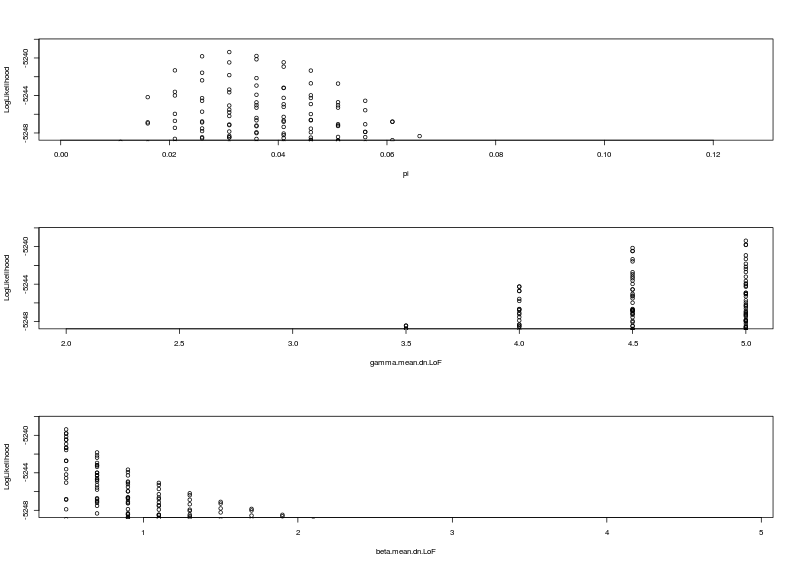

In [55]:
%%R -w 28 -h 20 -u cm
uLimit <- max(d.dn.grid.threshold[, 4]) + 1
lLimit <- uLimit - 10

par(mfrow = c(3, 1))
plot(d.dn.grid.threshold[, 1], d.dn.grid.threshold[, 4], xlab = 'pi', ylab = 'LogLikelihood', ylim = c(lLimit, uLimit))
plot(d.dn.grid.threshold[, 2], d.dn.grid.threshold[, 4], xlab = 'gamma.mean.dn.LoF', ylab = 'LogLikelihood', ylim = c(lLimit, uLimit))

plot(d.dn.grid.threshold[, 3], d.dn.grid.threshold[, 4], xlab = 'beta.mean.dn.LoF', ylab = 'LogLikelihood', ylim = c(lLimit, uLimit))

In [56]:
%%R
d.dn.grid.highLLK <- d.dn.grid.threshold[d.dn.grid.threshold[, 4] > lLimit, ]

print(tail(d.dn.grid.highLLK[order(d.dn.grid.highLLK[, 4]), ], 20 ))
print(summary(d.dn.grid.highLLK[, 2]))
message("\n\n")
print(summary(d.dn.grid.highLLK[, 1]))
message("\n\n")
print(summary(d.dn.grid.highLLK[, 3]))

        V1  V2  V3        V4
610  0.021 4.5 0.5 -5243.609
873  0.031 4.5 0.7 -5243.366
1158 0.041 5.0 0.7 -5243.203
1135 0.041 4.5 0.7 -5243.171
1004 0.036 4.5 0.7 -5242.939
1396 0.051 4.5 0.5 -5242.729
1288 0.046 5.0 0.5 -5242.703
765  0.026 5.0 0.7 -5242.380
1027 0.036 5.0 0.7 -5242.142
896  0.031 5.0 0.7 -5241.825
741  0.026 4.5 0.5 -5241.570
1265 0.046 4.5 0.5 -5241.344
633  0.021 5.0 0.5 -5241.317
1157 0.041 5.0 0.5 -5240.925
872  0.031 4.5 0.5 -5240.471
1134 0.041 4.5 0.5 -5240.459
1003 0.036 4.5 0.5 -5240.140
764  0.026 5.0 0.5 -5239.816
1026 0.036 5.0 0.5 -5239.781
895  0.031 5.0 0.5 -5239.368
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   4.500   4.500   4.643   5.000   5.000 



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01600 0.03100 0.03600 0.03761 0.04600 0.06600 



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.50    0.70    0.70    0.85    1.10    1.70 


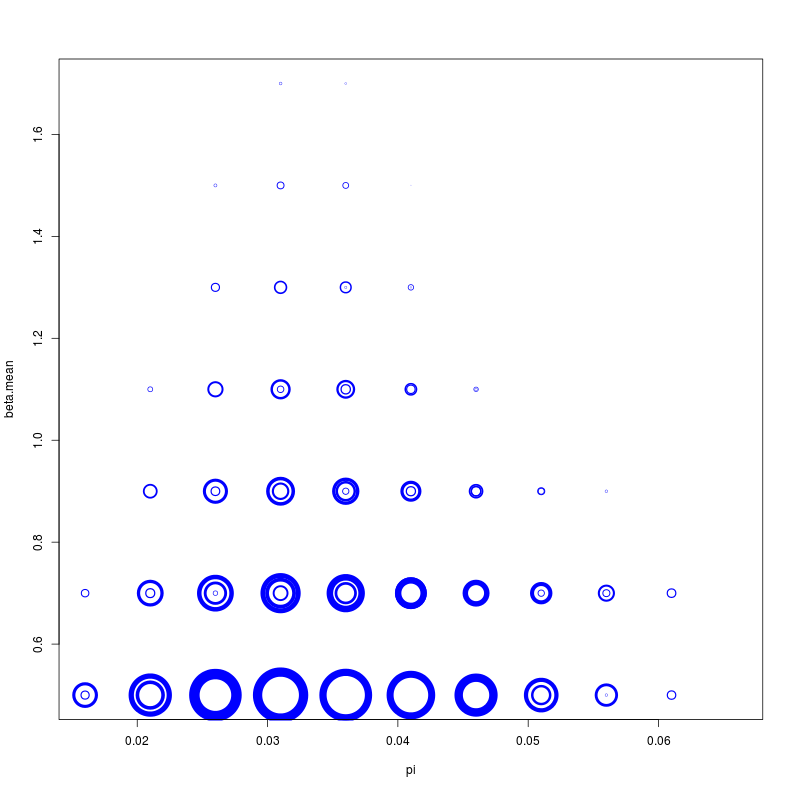

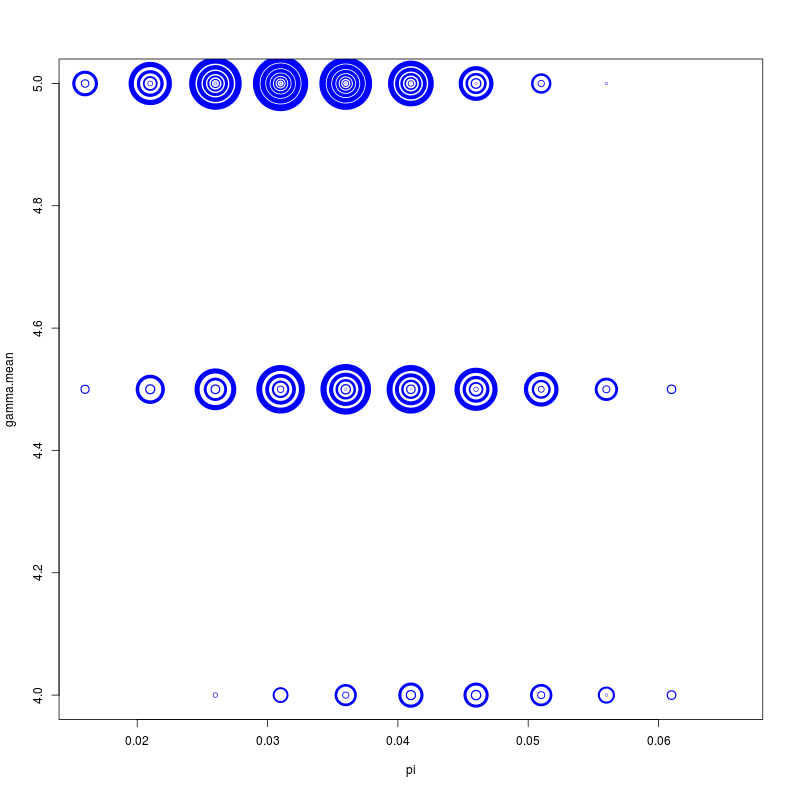

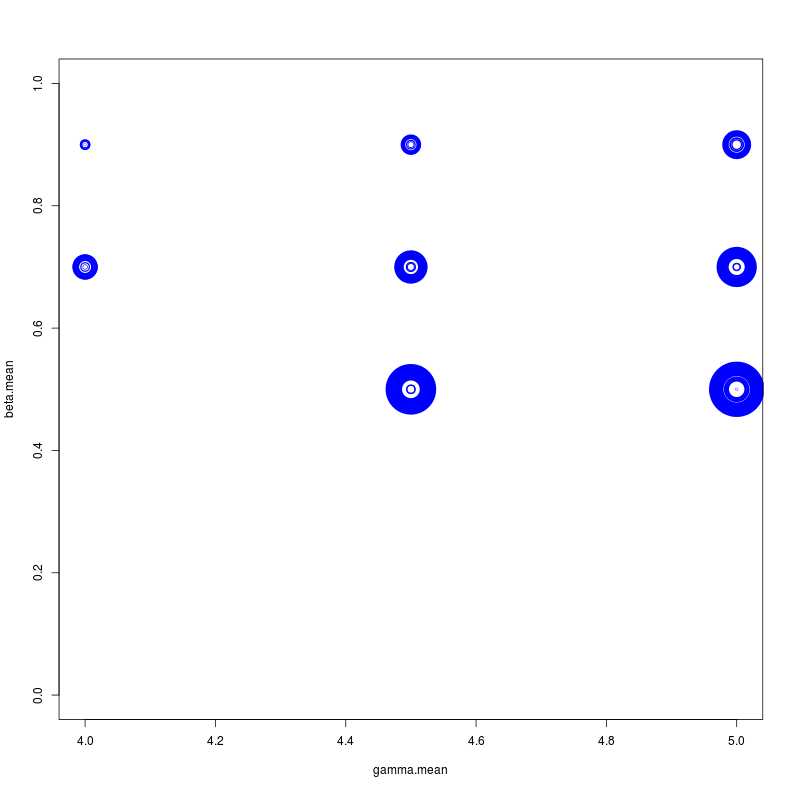

In [57]:
%%R -w 28 -h 28 -u cm
plot(d.dn.grid.highLLK[, 1], d.dn.grid.highLLK[, 2], lwd = d.dn.grid.highLLK[, 4] - lLimit, col = 'blue',
    xlab = 'pi', ylab = 'gamma.mean', cex = d.dn.grid.highLLK[, 4] - lLimit)

plot(d.dn.grid.highLLK[, 1], d.dn.grid.highLLK[, 3], lwd = d.dn.grid.highLLK[, 4] - lLimit, col = 'blue',
    xlab = 'pi', ylab = 'beta.mean', cex = d.dn.grid.highLLK[, 4] - lLimit)

plot(d.dn.grid.highLLK[, 2], d.dn.grid.highLLK[, 3], lwd = d.dn.grid.highLLK[, 4] - lLimit, col = 'blue',
    xlab = 'gamma.mean', ylab = 'beta.mean', cex = d.dn.grid.highLLK[, 4] - lLimit, ylim = c(0, 1))

abline(v = 20, col= 'red')

In [59]:
#!gist -p Test_grid_TADA_from_Minerva_forCombinedData.ipynb

In [86]:
!gist -u https://gist.github.com/99a091a87ce00eff2ddf Test_grid_TADA_from_Minerva.ipynb

https://gist.github.com/99a091a87ce00eff2ddf
